## Optimal Media Mix Budget Allocation

This Solution suggests optimal allocation of marketing budget across channels like print media, social media, radio, television, etc. based on their past performance using bayesian based market budget allocation method. Alongside, the solution accounts for the effect of non-marketing attributes- such as timeseries and contextual factors- on sales/revenue while recommending optimal budget allocation. The solution compares pre and post budget allocation of each marketing channel and computes predicted target KPI (revenue/ sales).

This sample notebook shows you how to execute clean-sentiment-classification-labels Algorithm from AWS Marketplace 

> **Note**: This is a reference notebook and it cannot run unless you make changes suggested in the notebook.

#### Pre-requisites:
1. **Note**: This notebook contains elements which render correctly in Jupyter interface. Open this notebook from an Amazon SageMaker Notebook Instance or Amazon SageMaker Studio.
1. Ensure that IAM role used has **AmazonSageMakerFullAccess**
1. Some hands-on experience using [Amazon SageMaker](https://aws.amazon.com/sagemaker/).
1. To use this algorithm successfully, ensure that:
    1. Either your IAM role has these three permissions and you have authority to make AWS Marketplace subscriptions in the AWS account used: 
        1. **aws-marketplace:ViewSubscriptions**
        1. **aws-marketplace:Unsubscribe**
        1. **aws-marketplace:Subscribe**  
    2. or your AWS account has a subscription to For Seller to update: Optimal Media Mix Budget Allocation. 

#### Contents:
1. [Subscribe to the algorithm](#1.-Subscribe-to-the-algorithm)
1. [Prepare dataset](#2.-Prepare-dataset)
	1. [Dataset format expected by the algorithm](#A.-Dataset-format-expected-by-the-algorithm)
	1. [Configure dataset](#B.-Configure-dataset)
	1. [Upload datasets to Amazon S3](#C.-Upload-datasets-to-Amazon-S3)
1. [Execute optimization model](#3.-Execute-optimization-model)
	1. [Set up environment](#3.1-Set-up-environment)
	1. [Execute model](#3.2-Execute-model)
    1. [Visualize Output](#3.3-Inspect-the-Output-in-S3)
1. [Clean-up](#4.-Clean-up)
	1. [Unsubscribe to the listing (optional)](#Unsubscribe-to-the-listing-(optional))


#### Usage instructions
You can run this notebook one cell at a time (By using Shift+Enter for running a cell).

### 1. Subscribe to the algorithm

To subscribe to the algorithm:
1. Open the algorithm listing page **Optimal Media Mix Budget Allocation**
1. On the AWS Marketplace listing,  click on **Continue to subscribe** button.
1. On the **Subscribe to this software** page, review and click on **"Accept Offer"** if you agree with EULA, pricing, and support terms. 
1. Once you click on **Continue to configuration button** and then choose a **region**, you will see a **Product Arn**. This is the algorithm ARN that you need to specify while training a custom ML model. Copy the ARN corresponding to your region and specify the same in the following cell.

In [1]:
algo_arn = "market-mix-modelling-optimisation1"

### 2. Prepare dataset

In [2]:
import os
import json 
import uuid
import boto3
import pickle
import base64
import tarfile
from pprint import pprint
from PIL import Image

import numpy as np
import pandas as pd

import urllib.request
from urllib.parse import urlparse

import sagemaker as sage
from sagemaker import ModelPackage
from sagemaker import get_execution_role

#### A. Dataset format expected by the algorithm

The algorithm requires data in the format as described for best results:
* Input File name should be input_zip.zip
* The input data files must contain two csv files.
* For detailed instructions, please refer sample notebook and algorithm input details

#### B. Configure dataset

In [3]:
training_dataset="Input/input_zip.zip"

#### C. Upload datasets to Amazon S3

In [4]:
role = get_execution_role()

In [ ]:
sagemaker_session = sage.Session()

bucket = sagemaker_session.default_bucket()
bucket

In [ ]:
# training input location
common_prefix = "market-mix-modelling-optimisation"
training_input_prefix = common_prefix + "/training-input-data"
TRAINING_WORKDIR = "Input" #Input directory in Jupyter Server
training_input = sagemaker_session.upload_data(TRAINING_WORKDIR, key_prefix=training_input_prefix) #uploads data from jupyter server to S3
print("Training input uploaded to " + training_input)

## 3. Execute the training process

Now that dataset is available in an accessible Amazon S3 bucket, we are ready to execute a training pipeline to get clean sentiment class labels using clean-sentiment-classification-labels Algorithm. 

### 3.1 Set up environment

In [7]:
output_location = 's3://{}/market-mix-modelling-optimisation/{}'.format(bucket, 'Output')

### 3.2 Execute model

For information on creating an `Estimator` object, see [documentation](https://sagemaker.readthedocs.io/en/stable/api/training/estimators.html)

In [8]:
training_instance_type="ml.m5.4xlarge"

In [9]:
#Create an estimator object for running a training job
estimator = sage.algorithm.AlgorithmEstimator(
    algorithm_arn=algo_arn,
    base_job_name="market-mix-modelling-optimisation-algo",
    role=role,
    train_instance_count=1,
    train_instance_type=training_instance_type,
    input_mode="File",
    output_path=output_location,
    sagemaker_session=sagemaker_session,
    instance_count=1,
    instance_type=training_instance_type
)

#Run the training job.
estimator.fit({"training": training_input})

2022-10-21 04:38:56 Starting - Starting the training job...
2022-10-21 04:39:19 Starting - Preparing the instances for trainingProfilerReport-1666327136: InProgress
......
2022-10-21 04:40:26 Downloading - Downloading input data...
2022-10-21 04:40:51 Training - Downloading the training image......
2022-10-21 04:41:57 Training - Training image download completed. Training in progress...2022-10-21 04:42:02.043426: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-21 04:42:02.100817: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-21 04:42:03.273199: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open

#015  0%|          | 0/2000 [00:00<?, ?it/s]#015warmup:   0%|          | 1/2000 [00:04<2:35:26,  4.67s/it, 1 steps of size 2.13e+00. acc. prob=0.00]#015warmup:   1%|          | 16/2000 [00:04<07:05,  4.66it/s, 936 steps of size 7.82e-03. acc. prob=0.70]#015warmup:   2%|▏         | 30/2000 [00:04<03:13, 10.17it/s, 1023 steps of size 3.98e-03. acc. prob=0.75]#015warmup:   2%|▏         | 42/2000 [00:04<02:01, 16.14it/s, 1023 steps of size 3.23e-03. acc. prob=0.77]#015warmup:   3%|▎         | 54/2000 [00:05<01:23, 23.40it/s, 1023 steps of size 2.30e-03. acc. prob=0.78]#015warmup:   3%|▎         | 66/2000 [00:05<00:59, 32.34it/s, 386 steps of size 8.13e-03. acc. prob=0.80] #015warmup:   4%|▍         | 82/2000 [00:05<00:40, 47.06it/s, 968 steps of size 2.45e-03. acc. prob=0.80]#015warmup:   5%|▍         | 95/2000 [00:05<00:33, 56.71it/s, 1023 steps of size 4.36e-03. acc. prob=0.81]#015warmup:   5%|▌         | 107/2000 [00:05<00:28, 66.71it/s, 255 steps of size 2.37e-02. acc. prob=0.81]#015wa


2022-10-21 04:42:52 Uploading - Uploading generated training model
2022-10-21 04:43:20 Completed - Training job completed
ProfilerReport-1666327136: NoIssuesFound
Training seconds: 157
Billable seconds: 157


See this [blog-post](https://aws.amazon.com/blogs/machine-learning/easily-monitor-and-visualize-metrics-while-training-models-on-amazon-sagemaker/) for more information how to visualize metrics during the process. You can also open the training job from [Amazon SageMaker console](https://console.aws.amazon.com/sagemaker/home?#/jobs/) and monitor the metrics/logs in **Monitor** section.

In [ ]:
#output is available on following path
estimator.output_path

## Note: Inferencing is done within training pipeline. Real time inference endpoint/batch transform job is not required.

### 3.3 Inspect the Output in S3

In [11]:
parsed_url = urlparse(estimator.output_path)
bucket_name = parsed_url.netloc
file_key = parsed_url.path[1:]+'/'+estimator.latest_training_job.job_name+'/output/'+"model.tar.gz"

s3_client = sagemaker_session.boto_session.client('s3')
response = s3_client.get_object(Bucket = sagemaker_session.default_bucket(), Key = file_key)

In [12]:
bucketFolder = estimator.output_path.rsplit('/')[3] +'/Output/'+ estimator.latest_training_job.job_name+'/output/'+"model.tar.gz"

In [ ]:
s3_conn = boto3.client("s3")
bucket_name=bucket
with open('output.tar.gz', 'wb') as f:
    s3_conn.download_fileobj(bucket_name, bucketFolder, f)
    print("Output file loaded from bucket")

In [16]:
with tarfile.open('output.tar.gz') as file:
    file.extractall('./output')

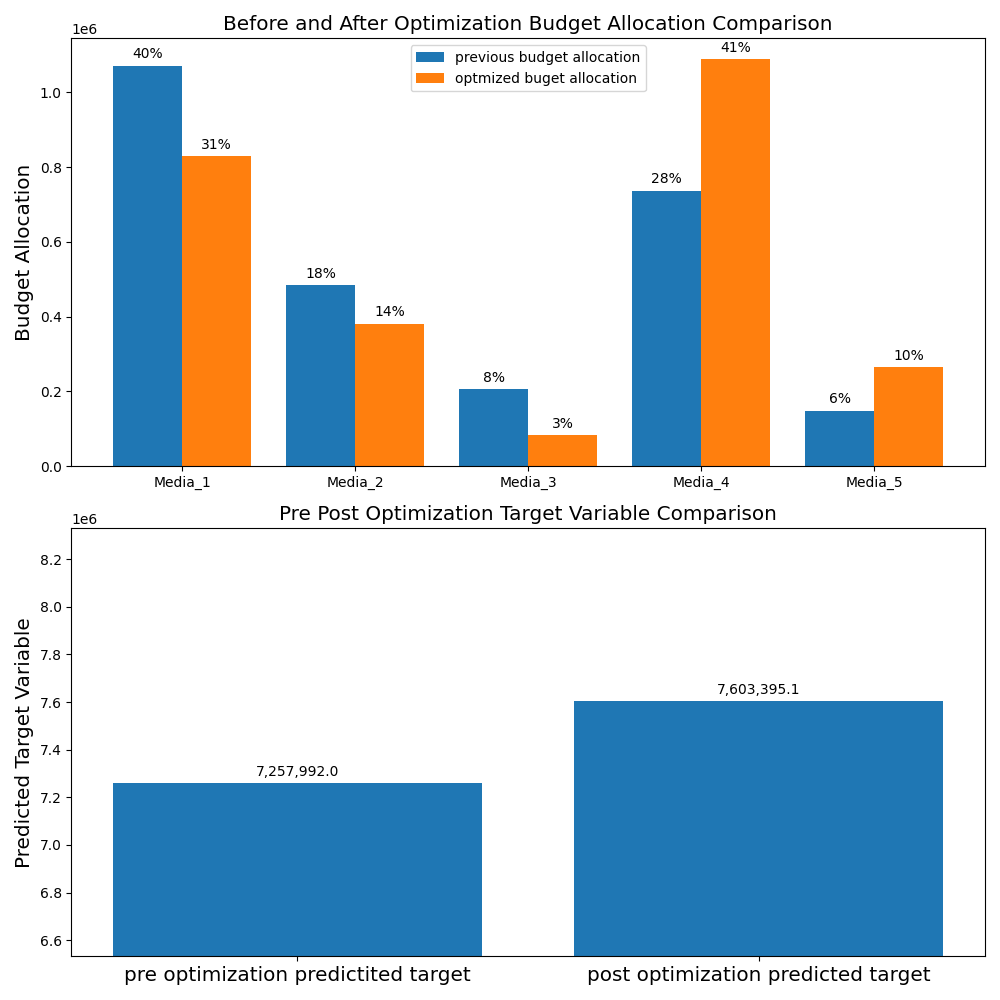

In [5]:
output_path = "output/"
output = Image.open(os.path.join(output_path, "output.png"))
output.show()

### 4. Clean-up

#### Unsubscribe to the listing (optional)

If you would like to unsubscribe to the algorithm, follow these steps. Before you cancel the subscription, ensure that you do not have any [deployable model](https://console.aws.amazon.com/sagemaker/home#/models) created from the model package or using the algorithm. Note - You can find this information by looking at the container name associated with the model. 

**Steps to unsubscribe to product from AWS Marketplace**:
1. Navigate to __Machine Learning__ tab on [__Your Software subscriptions page__](https://aws.amazon.com/marketplace/ai/library?productType=ml&ref_=mlmp_gitdemo_indust)
2. Locate the listing that you want to cancel the subscription for, and then choose __Cancel Subscription__  to cancel the subscription.